<a href="https://colab.research.google.com/github/meisan96/2doExamen354/blob/main/Examen3_proyecto_inf354.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto INF - 354  

Nombre: Machaca Mamani Rodrigo Moises

# **Modelo de abandono**

## **Dataset**

Este conjunto de datos contiene detalles de los clientes de un banco y la **variable objetivo**, es una variable binaria que refleja el hecho de si el cliente abandonó el banco (cerró su cuenta) o si continúa siendo un cliente.
0 - cerro su cuenta
1 - mantiene la cuenta

link: https://www.kaggle.com/shrutimechlearn/churn-modelling

## **Descripcion del Dataset**

Dataset de tamaño 10000x14

[Rownumber] = Números de fila del 1 al 10000 

[CustomerId] = ID únicos para identificación de clientes bancarios

[Surname] = Apellido del cliente

[CreditScore] = La puntuacion del cliente que fue dada por el Banco

[Geography] = Pais de origen del cliente

[Gender] = Género del cliente

[Age] = Edad del cliente

[Tenure] = Número de años que el cliente ha estado en el banco

[Balance] = Saldo bancario del cliente

[NumofProducts] = Número de productos bancarios que utiliza el cliente

[HasCrCard]= Si el cliente cuenta con una tarjeta de credito

[IsActiveMember] = Si el cliente es mienbro activo del banco o no

[Estimate Salary] = Salario estimado del cliente

[Exited] = Si el cliente cerro su cuenta(0-cerro la cuenta, 1-se mantiene)


In [2]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Preprocesamiento

In [3]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

se observa que no existen datos perdidos (NaN) tambien vemos que las columnas RowNumber, CustomerID y Surname no son utiles para la prediccion entonces no se los toma encuenta en X

Dividimos el dataset en X e Y:

Para X tendremos las columnas desde [CreditScore],..., [EstimatedSalary] de este modo excluimos las columnas que no aportaran a la prediccion.

Para Y solo necesitaremos la columna [Exited] donde nos dice si el cliente abadono o no el banco

In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

transformamos las variables que no son numericas, a numericas

en el caso de Geography se cambiara a: France - 0, Germany - 1, Spain - 2

en el caso de Gener se cambiara a: Famale - 0, Male - 1

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])

X_df=pd.DataFrame(X)
X_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0,1,1,1,101349
1,608,2,0,41,1,83807.9,1,0,1,112543
2,502,0,0,42,8,159661,3,1,0,113932
3,699,0,0,39,1,0,2,0,0,93826.6
4,850,2,0,43,2,125511,1,1,1,79084.1
5,645,2,1,44,8,113756,2,1,0,149757
6,822,0,1,50,7,0,2,1,1,10062.8
7,376,1,0,29,4,115047,4,1,0,119347
8,501,0,1,44,4,142051,2,0,1,74940.5
9,684,0,1,27,2,134604,1,1,1,71725.7


Las variables seran Normalizadas, estandarizaremos los datos para que toda nuestra matriz de caracteristicas este en el rango cercano a 0 de modo que facilite el trabajo del modelo a la hora de su uso.
por tanto ya tenemos los datos bien preprocesados 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_df_sc=pd.DataFrame(X)
X_df_sc.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
5,-0.057205,1.515067,0.912419,0.484225,1.032908,0.597329,0.807737,0.646092,-1.030670,0.863650
6,1.774174,-0.901886,0.912419,1.056346,0.687130,-1.225848,0.807737,0.646092,0.970243,-1.565487
7,-2.840488,0.306591,-1.095988,-0.946079,-0.350204,0.618019,4.246377,0.646092,-1.030670,0.334854
8,-1.547141,-0.901886,0.912419,0.484225,-0.350204,1.050820,0.807737,-1.547768,0.970243,-0.437329
9,0.346319,-0.901886,0.912419,-1.136786,-1.041760,0.931463,-0.911583,0.646092,0.970243,-0.493230


# Modelo

Como el dataset nos especifica nuestras clases, en este caso es **[Exited] donde nos indica que si abandono el banco o no**, se usa un modelo supervisado, para este caso usaremos **MLPerceptron** por el echo de seguir el patron de un cliente que deja el banco o no, y poder predecir el mismo echo.



In [38]:
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#creamos los 10 splits
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
iter_for_prediction = cv.split(X, y)
mat = []
#recorremos los 10 splits
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    #obtenemos los datos x_train, x_test, y_train, y_test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("\nSplit: ",index)
    mat.append([])
    #modelo que se usa es Multi-Layer Perceptron, asi entrenamos el modelo con
    #el split, para obtener la predeccion en ese split y hallar la matriz de confucion
    # asi mismo sacar el score
    mlp = MLPClassifier(tol=1e-2)
    mlp.fit(X_train,y_train)
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    score = metrics.accuracy_score(y_test, y_pred)
    mat[index].append(score)
    print("",cm)
    print("Score: ",score)
    #llamamos a 3 modelos (DecisionTree, GaussianNB y ForestRandom) para sacar los 
    #scores en 10 splits y realizar una comparacion
    treef = tree.DecisionTreeClassifier()
    randomf = RandomForestClassifier(random_state=0)
    gnb = GaussianNB()
    sk_clasificador = {'DecisionTree': treef,
                       'GaussianNB':gnb,
                       'RandomForest':randomf}
    #obtenemos los scores de los modelos y los guardamos en una matriz
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        estimador.fit(X_train,y_train)
        y_pred = estimador.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        mat[index].append(score)
tab = pd.DataFrame(mat, columns = ['MLPerceptron', 'DecisionTree','GaussianNB','RandomForest'])
print(tab)


Split:  0
 [[1537   56]
 [ 243  164]]
Score:  0.8505

Split:  1
 [[1544   49]
 [ 249  158]]
Score:  0.851

Split:  2
 [[1543   50]
 [ 241  166]]
Score:  0.8545

Split:  3
 [[1537   56]
 [ 252  155]]
Score:  0.846

Split:  4
 [[1538   55]
 [ 229  178]]
Score:  0.858

Split:  5
 [[1532   61]
 [ 242  165]]
Score:  0.8485

Split:  6
 [[1531   62]
 [ 241  166]]
Score:  0.8485

Split:  7
 [[1547   46]
 [ 242  165]]
Score:  0.856

Split:  8
 [[1550   43]
 [ 246  161]]
Score:  0.8555

Split:  9
 [[1546   47]
 [ 236  171]]
Score:  0.8585
   MLPerceptron  DecisionTree  GaussianNB  RandomForest
0        0.8505        0.7915      0.8230        0.8620
1        0.8510        0.7830      0.8205        0.8590
2        0.8545        0.7815      0.8275        0.8565
3        0.8460        0.7835      0.8255        0.8565
4        0.8580        0.7775      0.8355        0.8655
5        0.8485        0.7880      0.8305        0.8570
6        0.8485        0.7880      0.8210        0.8560
7        0.8560 

#Conclusion

Mientras el score de un modelo sea alto, se dice que su modelo es correcto, pero si el score se acerca demasiado al 1 se dice que esta sobreajustado, nuestra evalucacion saca que esta entre el 0.8460 y 0.8585 que dice que nuestro modelo es aceptable, tambien observamos la tabla de de comparacion con otros modelos y vemos que MLPerceptron tiene mejor score en los 10 splits que el modelo de arbol de decision y el modelo Gaussian, pero vemos que RandomForest nos da mejores scores que nuestro modelo pero tampoco es por mucho, y que en split 7 nuestro modelo supero al del RandomForest.

El modelo Multi-Layer Perceptron si hace una buena prediccion a la hora de preveer si un cliente va dejar el banco o no.

Se observa en la grafica el comportamiento de los scores de MLP comparado con los demas.

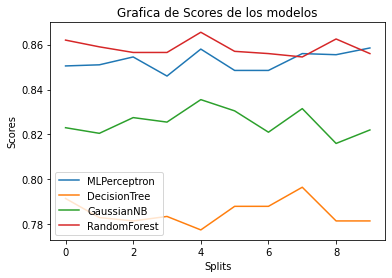

In [39]:
import matplotlib.pyplot as plt
x1 = tab['MLPerceptron']
x2 = tab['DecisionTree']
x3 = tab['GaussianNB']
x4 = tab['RandomForest']
plt.plot(x1,label='MLPerceptron')
plt.plot(x2,label='DecisionTree')
plt.plot(x3,label='GaussianNB')
plt.plot(x4,label='RandomForest')
plt.xlabel('Splits')
plt.ylabel('Scores')
plt.title("Grafica de Scores de los modelos")
plt.legend()
plt.show()